<a href="https://colab.research.google.com/github/ankitashrivastav12/ML-MODELS/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
df=pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [2]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [3]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [4]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [5]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df= pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [7]:
x=df.drop(["Exited"],axis="columns")
y=df.Exited
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10,stratify=y)

In [8]:
print(x_test.shape)

(2000, 11)


In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled_train=scaler.fit_transform(x_train)
x_scaled_test=scaler.transform(x_test)

In [36]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model=Sequential()
model.add(Dense(11,activation="relu",input_dim=11))
model.add(Dense(11,activation="relu",input_dim=11))
model.add(Dense(1,activation="sigmoid"))

In [37]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 11)                132       
                                                                 
 dense_7 (Dense)             (None, 11)                132       
                                                                 
 dense_8 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [54]:
history=model.fit(x_scaled_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 0.3134 - accuracy: 0.8691 - val_loss: 0.3423 - val_accuracy: 0.8637
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3127 - accuracy: 0.8722 - val_loss: 0.3441 - val_accuracy: 0.8656
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3130 - accuracy: 0.8730 - val_loss: 0.3442 - val_accuracy: 0.8637
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3126 - accuracy: 0.8736 - val_loss: 0.3434 - val_accuracy: 0.8650
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3125 - accuracy: 0.8719 - val_loss: 0.3430 - val_accuracy: 0.8644
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3118 - accuracy: 0.8730 - val_loss: 0.3422 - val_accuracy: 0.8650
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3127 - accuracy: 0.8719 - val_loss: 0.3403 - val_accuracy: 0.8700

In [48]:
model.layers[2].get_weights()

[array([[ 0.73838955],
        [-1.7126334 ],
        [ 0.9116433 ],
        [-0.31812128],
        [ 1.3635764 ],
        [-0.6896887 ],
        [ 1.7983389 ],
        [-0.86642045],
        [ 2.1339684 ],
        [ 1.3932352 ],
        [ 0.7446167 ]], dtype=float32),
 array([-0.18659598], dtype=float32)]

In [49]:
y_log=model.predict(x_scaled_test)
y_pred=np.where(y_log>0.5,1,0)

63/63 [==============================] - 0s 3ms/step


In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8585

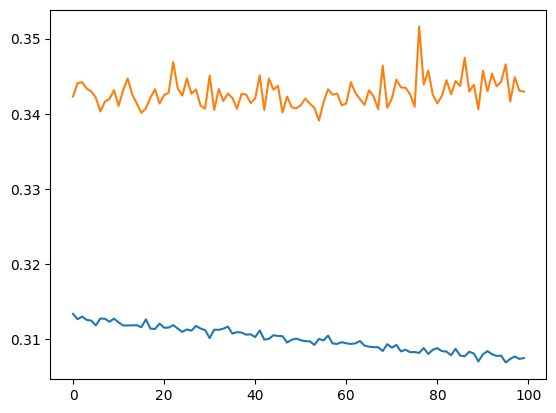

In [58]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

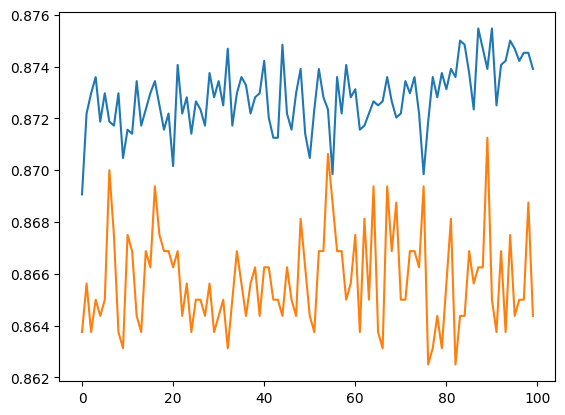

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])